In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from copy import deepcopy

from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM
import statistics as stats
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde

import semlinlens_v2bRprior as lens
import func_get_h_eta as h_eta
import func_get_rel_CK as relCK

In [21]:
plt.rcParams.update({'font.size': 16, 'text.usetex': False})
n_samples = 13

In [22]:
dpi_set=400
cosmo = FlatLambdaCDM(H0=100,Om0=0.315)
folder = './'
root = 'mock_'
color='blue'
kind = 'threshlow'

files_dat = []
files_txt = []
for n in range(0,n_samples):
    files_dat.append(folder+root+str(n+1)+'.dat')
    files_txt.append(folder+root+str(n+1)+'.txt')

In [23]:
# totalmag, peakmag, Rij, tau12, tau13, tau14, tau23, tau24, tau34, time_max, time_min, annulus_length = rel.get_info(files_dat)
# print(annulus_length)
info = relCK.get_info(files_dat)

drarr = info[1]
taumat = info[2]
ann14 = drarr[:,3] 
ann13 = drarr[:,2]
ann12 = drarr[:,1]
tau14 = taumat[:,0,3]
tau13 = taumat[:,0,2]
tau12 = taumat[:,0,1]
annulus_length =  ann12

imgpos, drarr, taumat


median is: 0.2201876655822188
cutoff at below: 0.2201876655822188
std dev is:0.16599365298036717
mean is:0.2427705654335056
[False, False, True, True, False, False, True, False, True, False, True, True, False]
6


Text(0.5, 0, '$\\Delta r_{1,2} / R_E$')

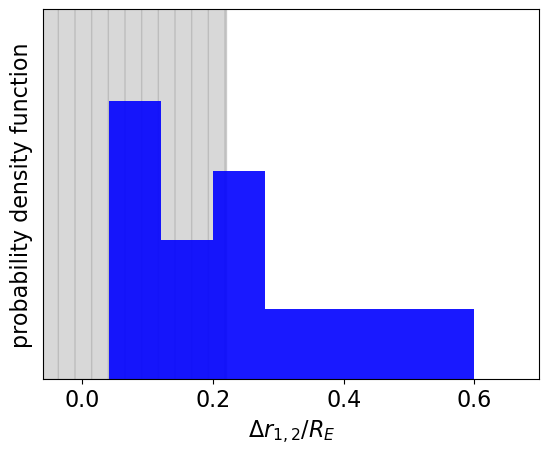

In [25]:
x_flag = ann12
flags = []

med = stats.median(x_flag)
error = (stats.stdev(x_flag))
mean = stats.mean(x_flag)

thresh = med

print('median is: '+str(med))
print('cutoff at below: '+str(med))
print('std dev is:'+str(error))
print('mean is:'+str(mean))

if kind == 'all':
    flags = [True]*100

if kind == 'threshlow':
    for n in range(0,len(x_flag)):
        if x_flag[n] <= thresh:
            flags.append(False)
        else:
            flags.append(True)
print(flags)
print(sum(flags))

bin_num = 7
counts, bins = np.histogram(ann12, density = True)

plt.fill_between([-1,thresh], [np.max(counts)+3,np.max(counts)+3], alpha=0.3, hatch='|', color='grey')
plt.hist(ann12, density = True, alpha=0.9, color=color, bins=bin_num)
plt.xlim([np.min(ann12) - 0.1, np.max(ann12)+0.1])
plt.ylim([0, np.max(counts)+1])

plt.yticks([])
plt.ylabel('probability density function')
plt.xlabel('$\Delta r_{1,2} / R_E$')